<a href="https://colab.research.google.com/github/Mahdi-Kriaa/faulty_water_pumps_predicton/blob/main/faulty_water_pumps_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview



## Project Description



This project aims to leverage machine learning techniques to predict the operational status of water pumps in Tanzania. The goal is to identify faulty water pumps before they fail, allowing for timely maintenance and minimizing downtime. Water supply in Tanzania is critical, and pump failures can have significant impacts on local communities. By predicting these failures, we can ensure a more reliable water supply and improve the quality of life for these communities.

## Data Source


The data for this project comes from Kaggle and it is originally comes from the Taarifa waterpoints dashboard, which aggregates data from the Tanzania Ministry of Water.

Link to dataset : https://www.kaggle.com/datasets/sumeetsawant/pump-it-up-challenge-driven-data?select=training_Set_values.csv https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view

For this dataset, there were 59400 rows and 41 columns.

## Data Dictionary



- amount_tsh: Total static head (amount - water available to waterpoint)
- date_recorded: The date the row was entered
- funder: Who funded the well
- gps_height: Altitude of the well
- installer: Organization that installed the well
- longitude: GPS coordinate
- latitude: GPS coordinate
- wpt_name: Name of the waterpoint if there is one
- num_private: is it private
- basin: Geographic water basin
- subvillage: Geographic location
- region: Geographic location
- region_code: Geographic location (coded)
- district_code: Geographic location (coded)
- lga: Geographic location
- ward: Geographic location
- population: Population around the well
- public_meeting: True/False
- recorded_by: Group entering this row of data
- scheme_management: Who operates the waterpoint
- scheme_name: Who operates the waterpoint
- permit: If the waterpoint is permitted
- construction_year: Year the waterpoint was constructed
- extraction_type: The kind of extraction the waterpoint uses
- extraction_type_group: The kind of extraction the waterpoint uses
- extraction_type_class: The kind of extraction the waterpoint uses
- management: How the waterpoint is managed
- management_group: How the waterpoint is managed
- payment: What the water costs
- payment_type: What the water costs
- water_quality: The quality of the water
- quality_group: The quality of the water
- quantity: The quantity of water
- quantity_group: The quantity of water
- source: The source of the water
- source_type: The source of the water
- source_class: The source of the water
- waterpoint_type: The kind of waterpoint
- waterpoint_type_group: The kind of waterpoint
- group_state: Water pump state

# Imports



In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as smt_pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix
from sklearn import set_config

# Configuring General Settings



In [ ]:
warnings.filterwarnings("ignore")
set_config(transform_output="pandas")
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

# Loading Data


In [ ]:
file_id_features = "1QrNFlZxrLb2vl0zY96LXgNJctH6zprdr"
file_id_target = "1DKPsAit8BHV3TQp1l8tDH6pVMxTTM6O1"
df_features = pd.read_csv(f"https://docs.google.com/uc?id={file_id_features}")
df_target = pd.read_csv(f"https://docs.google.com/uc?id={file_id_target}")

# EDA & Data Cleaning



In [ ]:
print(df_features.shape)
df_features.head(20)

(59400, 40)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [ ]:
df_features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [ ]:
print(df_target.shape)
df_target.head()

(59400, 2)


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [ ]:
df_pumps = df_features.merge(df_target,on="id")

In [ ]:
# check duplicates
df_pumps.duplicated().sum()

0

In [ ]:
# drop duplicate rows
df_pumps.drop_duplicates(inplace=True)
df_pumps.shape

(59400, 41)

In [ ]:
# display normalized number of missing values
sr_nan = (df_pumps.isna().sum())/df_pumps.shape[0]
sr_nan[sr_nan!=0]

funder               0.061195
installer            0.061532
subvillage           0.006246
public_meeting       0.056128
scheme_management    0.065269
scheme_name          0.474175
permit               0.051448
dtype: float64

In [ ]:
def replace_nan_id(df, id, column):
    index = df.index
    values = df.groupby(id).first()[column]
    values_dict = values.to_dict()
    df_reindexed = df_pumps.set_index(id)
    df_addressed = df_reindexed[column].fillna(values_dict).reset_index()
    return df_addressed.reindex(index)[column]

In [ ]:
# replace missing values deponding on wpt_name
for c in sr_nan[sr_nan != 0].index:
    df_pumps[c] = replace_nan_id(df_pumps,"wpt_name",c)

In [ ]:
# display normalized number of missing values after replacement
sr_nan = (df_pumps.isna().sum())/df_pumps.shape[0]
sr_nan[sr_nan!=0]

funder               0.039613
installer            0.039579
subvillage           0.002896
public_meeting       0.034646
scheme_management    0.039848
scheme_name          0.324596
permit               0.033165
dtype: float64

In [ ]:
# drop unecessary columns
df_pumps.drop(columns=["id","recorded_by","funder","installer","wpt_name","scheme_name","subvillage","lga","ward","district_code","region_code"],inplace=True)

id and recorded_by columns were dropped because it dont represent a useful information. funder and installer, wpt_name and scheme_name features were droppped for more generalized solution as it can exist another classes. rgarding the other dropped features, they were removed to ovoid overfitting as they all represent locoation informations (we already have the region, logitude and lititude features).

In [ ]:
# cardinal of categorical features
df_pumps[["num_private","construction_year"]] = df_pumps[["num_private","construction_year"]].astype("str")
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for e in cat_cols :
  print(f"{e}: {len(df_pumps[e].unique())}")

num_private: 65
basin: 9
region: 21
public_meeting: 3
scheme_management: 13
permit: 3
construction_year: 55
extraction_type: 18
extraction_type_group: 13
extraction_type_class: 7
management: 12
management_group: 5
payment: 7
payment_type: 7
water_quality: 8
quality_group: 6
quantity: 5
quantity_group: 5
source: 10
source_type: 7
source_class: 3
waterpoint_type: 7
waterpoint_type_group: 6
status_group: 3


In [ ]:
# display classes to verify inconsistencies
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
for c in cat_cols :
  print(f"* {c}: {df_pumps[c].unique()}")

* num_private: ['0' '39' '5' '45' '6' '3' '698' '32' '15' '7' '25' '102' '1' '93' '14'
 '34' '120' '17' '213' '47' '8' '41' '80' '141' '20' '35' '131' '4' '22'
 '11' '87' '61' '65' '136' '2' '180' '38' '62' '9' '16' '23' '42' '24'
 '12' '668' '672' '58' '150' '280' '160' '50' '1776' '30' '27' '10' '94'
 '26' '450' '240' '755' '60' '111' '300' '55' '1402']
* basin: ['Lake Nyasa' 'Lake Victoria' 'Pangani' 'Ruvuma / Southern Coast'
 'Internal' 'Lake Tanganyika' 'Wami / Ruvu' 'Rufiji' 'Lake Rukwa']
* region: ['Iringa' 'Mara' 'Manyara' 'Mtwara' 'Kagera' 'Tanga' 'Shinyanga' 'Tabora'
 'Pwani' 'Ruvuma' 'Kilimanjaro' 'Rukwa' 'Mwanza' 'Kigoma' 'Lindi' 'Dodoma'
 'Arusha' 'Mbeya' 'Singida' 'Morogoro' 'Dar es Salaam']
* public_meeting: [True None False]
* scheme_management: ['VWC' 'Other' 'WUA' 'WUG' None 'Private operator' 'Water Board'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']
* permit: [False True None]
* construction_year: ['1999' '2010' '2009' '1986' '0' '2011' '1987' '19

In [ ]:
# replace missing values that are not in nan format by nan
df_pumps.replace(["unknown","None"],np.nan,inplace=True)

In [ ]:
# change values other than 0 to 1 for num_private feature
df_pumps["num_private"] = df_pumps["num_private"].apply(lambda x : "0" if  x == "0" else "1")

In [ ]:
# check identical values in two columns
def   check_identical_columns(data,c1,c2,include_na=False) :
          data.reset_index(drop=True,inplace=True)
          data = data.astype(str).apply(lambda x: x.str.lower())
          n = data.shape[0]
          j = 0
          for i in range(n):
            if data.loc[i,c1] == data.loc[i,c2] :
                j += 1
            if include_na :
                if np.isnan(data.loc[i,c1]) | np.isnan(data.loc[i,c2]) :
                  j += 1
          return j/n

In [ ]:
# check columns that seem to present same information
print("extraction_type / extraction_type_group :",check_identical_columns(df_pumps,"extraction_type","extraction_type_group"))
print("extraction_type / extraction_type_class :",check_identical_columns(df_pumps,"extraction_type","extraction_type_class"))
print("payment / payment_type :",check_identical_columns(df_pumps,"payment","payment_type"))
print("water_quality / quality_group :",check_identical_columns(df_pumps,"water_quality","quality_group"))
print("quantity / quantity_group :",check_identical_columns(df_pumps,"quantity","quantity_group"))
print("source / source_type :",check_identical_columns(df_pumps,"source","source_type"))
print("waterpoint_type / waterpoint_type_group :",check_identical_columns(df_pumps,"waterpoint_type","waterpoint_type_group"))
print("scheme_management / management :",check_identical_columns(df_pumps,"scheme_management","management"))

Except the "water_quality / quality_group" pair, columns in each these pairs represent almost the same information so we can drop one of theme.

In [ ]:
# drop useless features
df_pumps.drop(columns=["extraction_type_group","extraction_type_class","payment_type","quantity_group","source_type","waterpoint_type_group","scheme_management"],inplace=True)

In [ ]:
# disply contingency matrix for "water_quality" and "quality_group" features
contingency_table = pd.crosstab(df_pumps['water_quality'],df_pumps['quality_group'])
sns.heatmap(contingency_table, fmt="d", annot=True, cmap="Greens")
plt.title("water_quality VS quality_group")

these two features represent almost the same information so we can drop the "quality group" column (it provide slightly less detailed information)

In [ ]:
# drop "quality_group" feature
df_pumps.drop(columns="quality_group",inplace=True)

In [ ]:
int_cols = df_pumps.select_dtypes("int").columns
df_pumps[int_cols] = df_pumps[int_cols].astype("float")

In [ ]:
# histograms and boxplots of numerical variables
num_cols = df_pumps.select_dtypes("float").columns.delete(0)
for c in num_cols:
  gridspec = {'height_ratios':[0.8,0.2]}
  fig, axes = plt.subplots(nrows=2, figsize=(6,4),
                           sharex=True, gridspec_kw=gridspec)
  sns.histplot(data=df_pumps, x=c, color="#5C6BC0", alpha=0.8, ax=axes[0])
  sns.boxplot(data=df_pumps, x=c, color="#5C6BC0", boxprops=dict(alpha=0.8),
              ax=axes[1])
  axes[0].grid(axis="x")
  fig.tight_layout()
  plt.show()

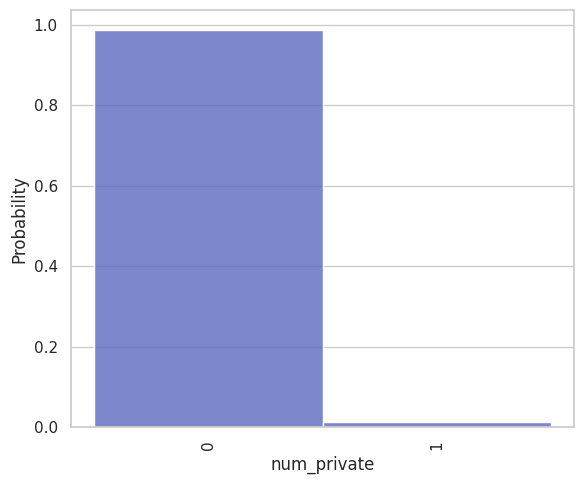

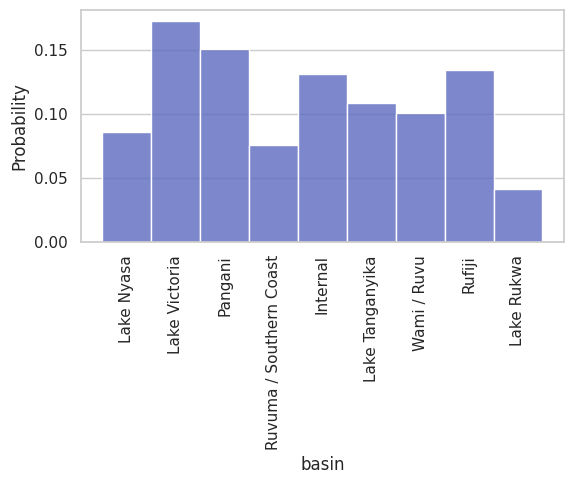

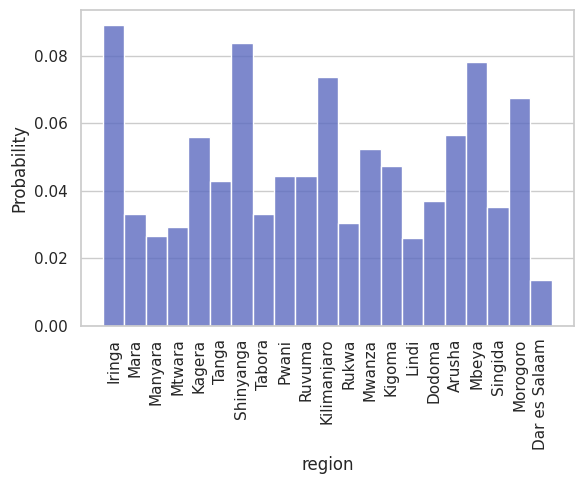

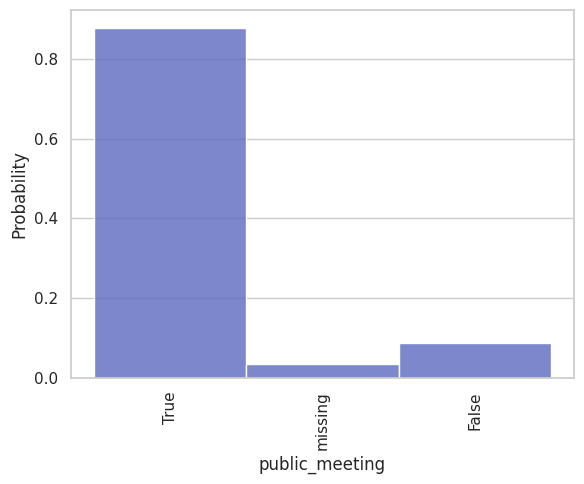

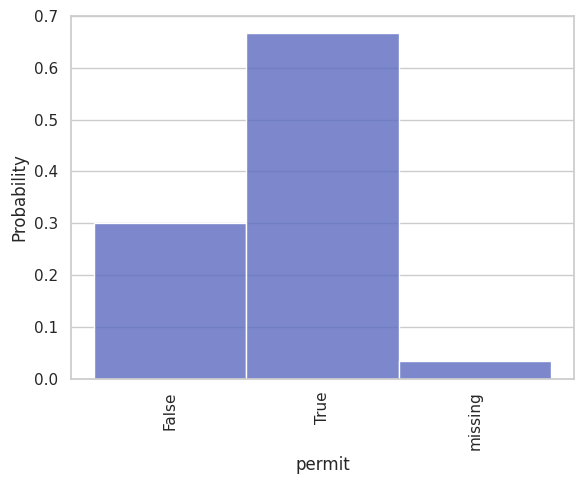

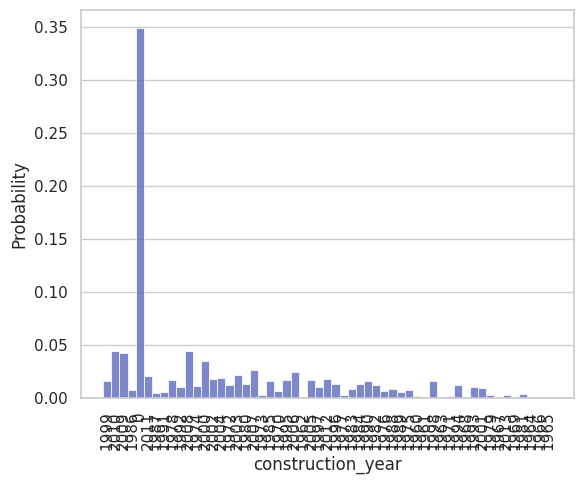

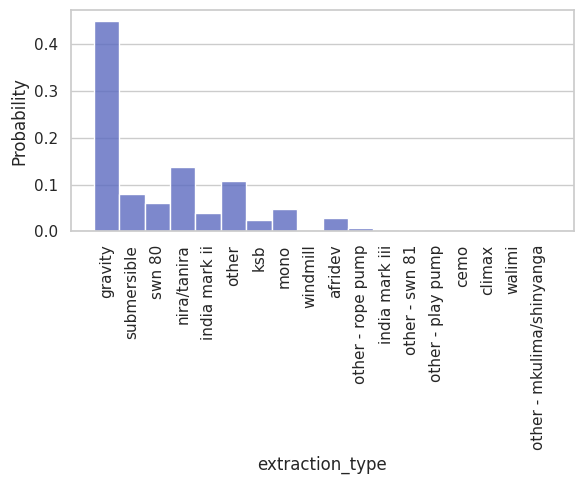

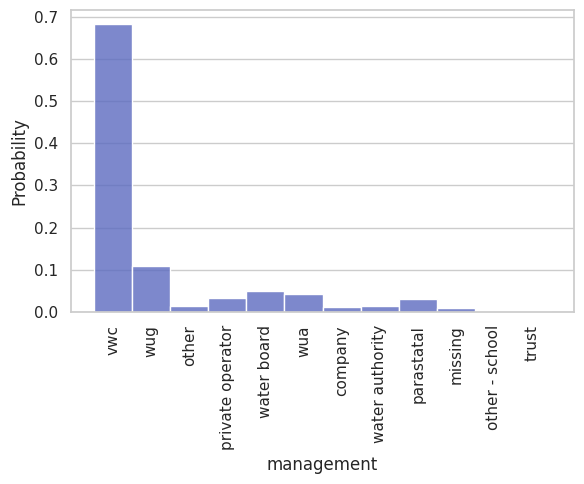

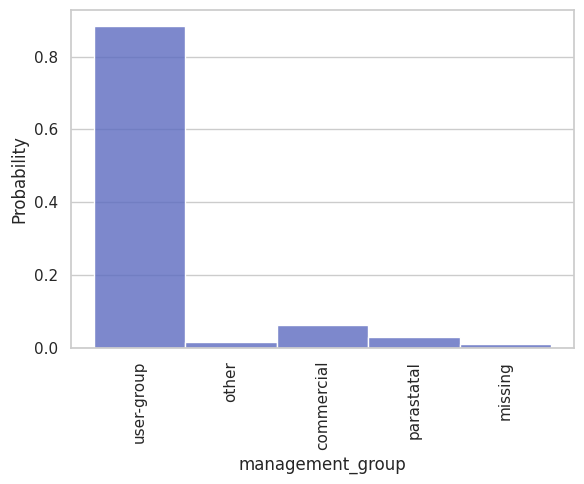

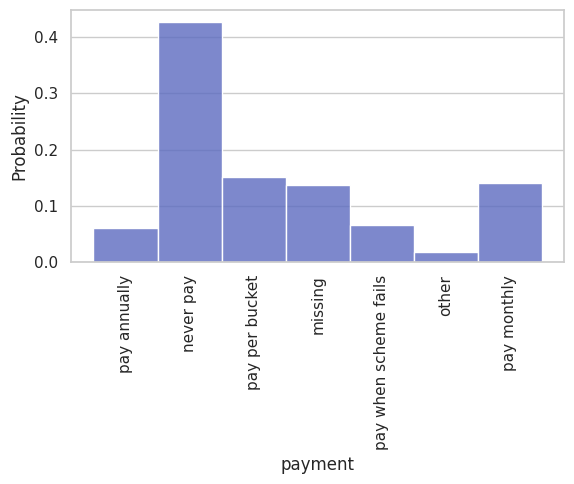

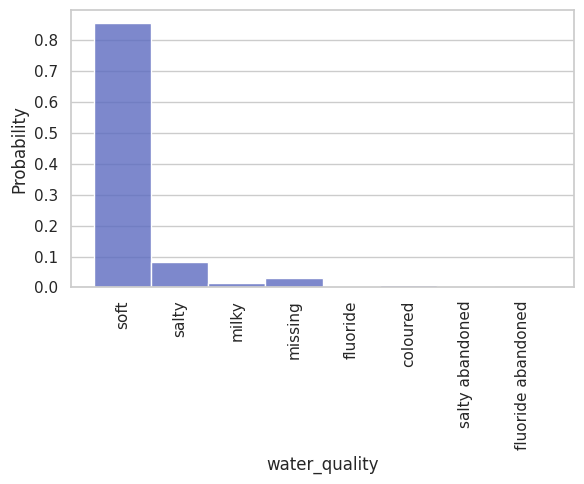

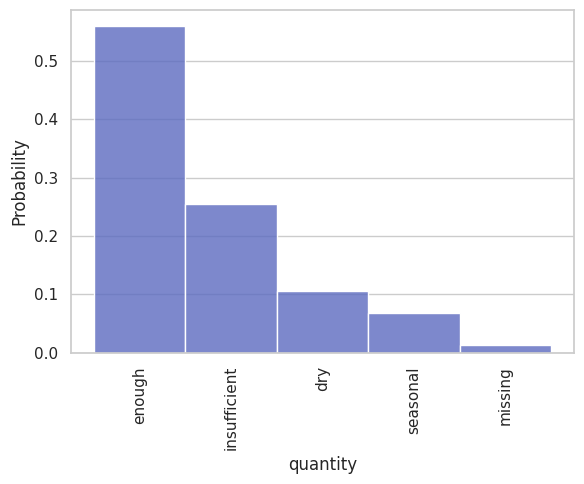

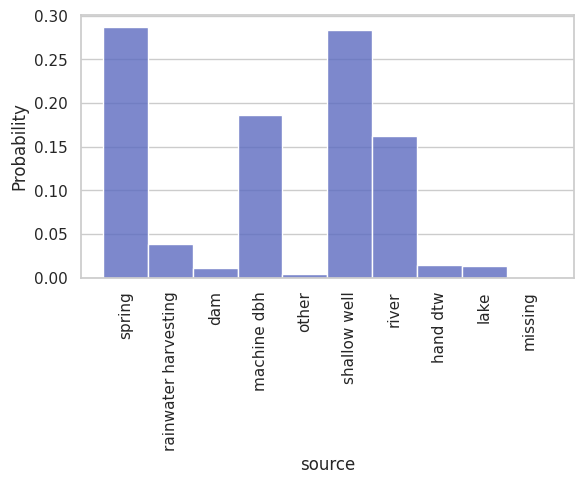

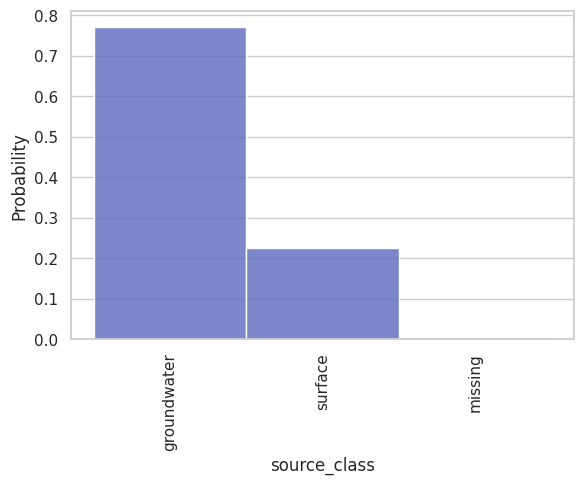

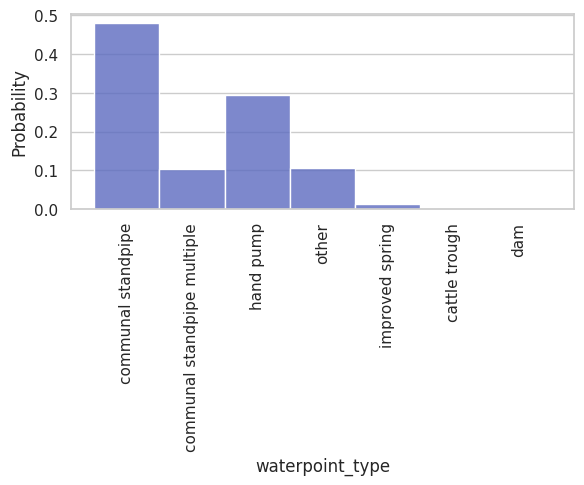

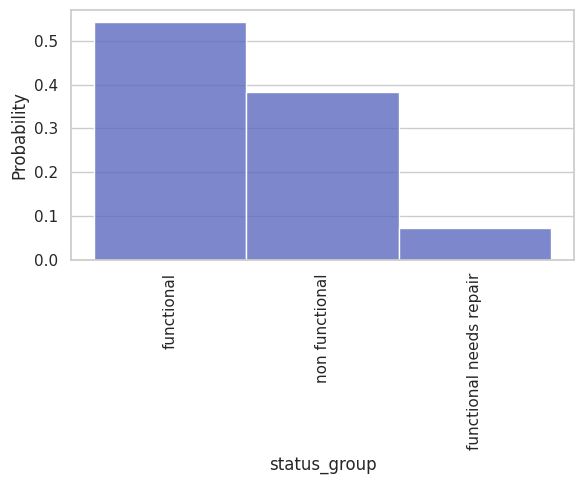

In [ ]:
# histograms of categorical variables
cat_cols = df_pumps.select_dtypes("object").columns.delete(0)
df_copy = df_pumps.copy()
df_copy[cat_cols] = df_copy[cat_cols].fillna("missing")
for c in cat_cols:
  plt.figure(figsize=(6,5))
  sns.histplot(data=df_copy[cat_cols].astype(str), x=c, stat="probability",
               color="#5C6BC0", alpha=0.8)
  plt.grid(axis="x")
  plt.xticks(rotation=90)
  plt.tight_layout()
  plt.show()

there are a lot of missing values for the "construction_year" feature (noted 0) but as it is important it will be keeped and missing values will be replaced. We see that num_private feature is quasi_constatnt and there are several features with umbalanced classes.

In [ ]:
# drop num_private and source_class column
df_pumps.drop(columns=["num_private","source_class","management_group"],inplace=True)

- the source class and management_group features were removed because they have umbalanced classes and we have similar informations repreented by other features.
- the source and management features will be transformed to classes with more close proportions

In [ ]:
class_for_replacement = ['submersible','swn 80','nira/tanira','india mark ii',
'ksb','mono','windmill' ,'afridev' ,'other - rope pump', 'india mark iii',
'other - swn 81' ,'other - play pump' ,'cemo', 'climax' ,'walimi' ,
'other - mkulima/shinyanga','wug' , 'private operator' ,'water board', 'wua', 'company',
'water authority', 'parastatal', 'other - school', 'trust','pay annually' ,'pay per bucket' ,
'pay when scheme fails','pay monthly', 'salty','milky','fluoride','coloured','salty abandoned',
'fluoride abandoned', 'insufficient' ,'dry', 'seasonal', 'rainwater harvesting' ,'dam' ,
'river', 'hand dtw' ,'lake', 'communal standpipe multiple',
'improved spring' ,'cattle trough' ,'dam']
cat_cols = df_pumps.select_dtypes("object").columns
for c in cat_cols :
    df_pumps[c] = df_pumps[c].apply(lambda x : "other" if x in class_for_replacement else x)

In [ ]:
# scatter_map plot
px.scatter_mapbox(df_pumps, lat='latitude', lon='longitude',
                  color="region", mapbox_style="open-street-map")

We see that the regions are distributed over the entire Tanzania country so they can be regrouped in south, middle and north classes for a generalized model and to deal with umbalanced classes.

Text(0.5, 1.0, 'Numerical Features Correlations')

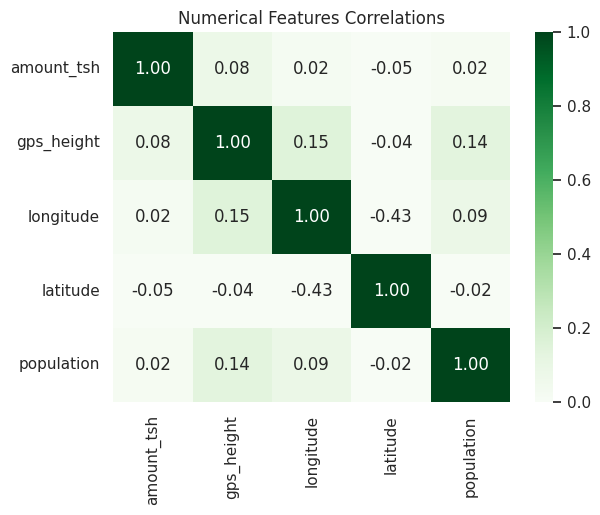

In [ ]:
# numerical variables correlations
corr_matrix = df_pumps.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Greens", vmin=0, vmax=1)
plt.title("Numerical Features Correlations")

There is no correlation between each pair of numerical features

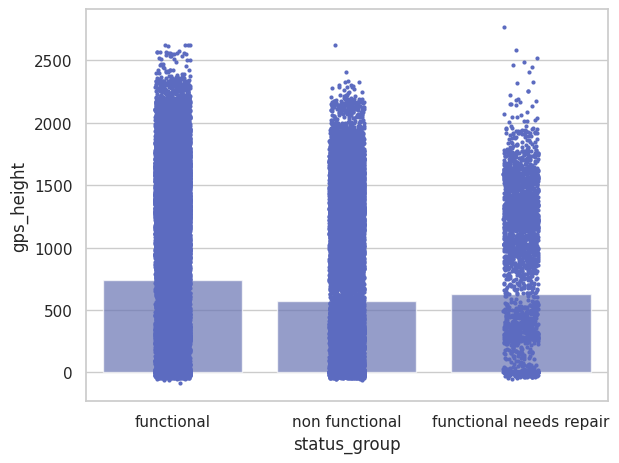

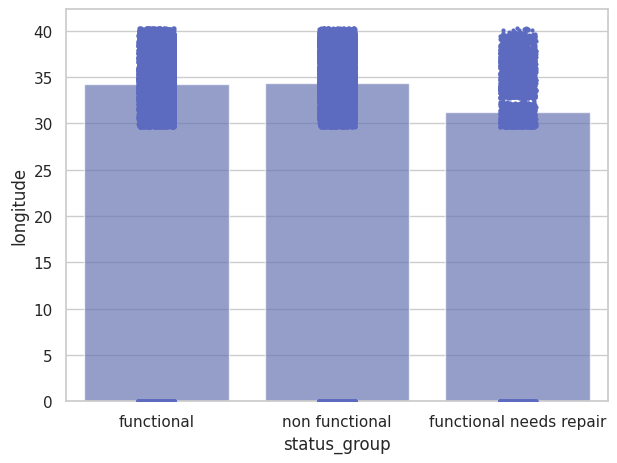

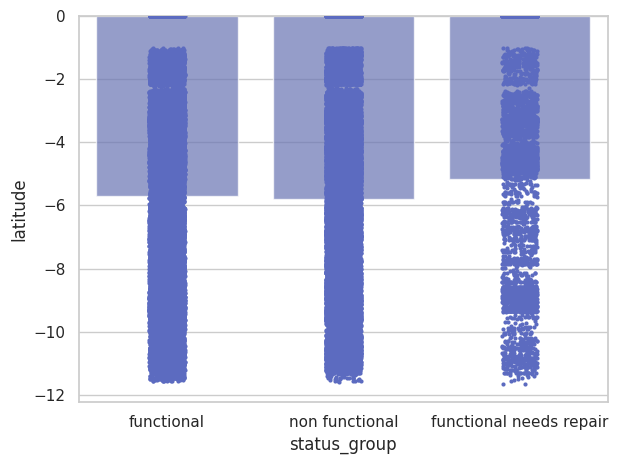

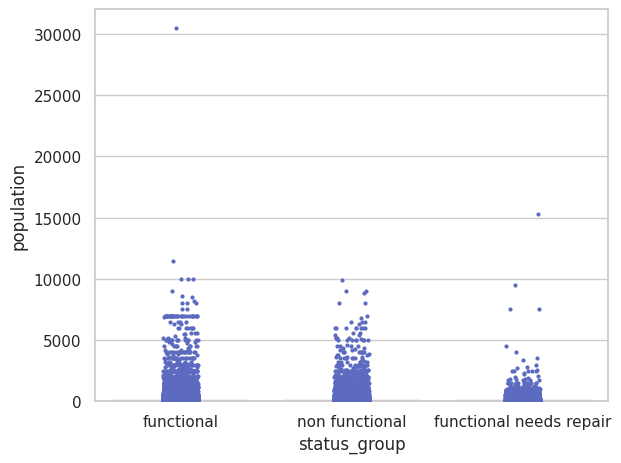

In [ ]:
# numerical features vs target
for c in num_cols :
  fig, axis = plt.subplots()
  sns.barplot(data=df_copy, x="status_group", y=c, errorbar=None, color="#5C6BC0", alpha=0.7, ax=axis)
  sns.stripplot(data=df_copy, x="status_group", y=c, size=3, color="#5C6BC0", ax=axis)
  fig.tight_layout()

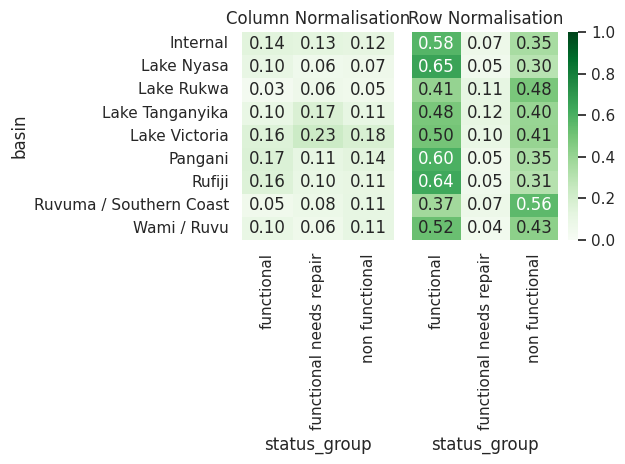

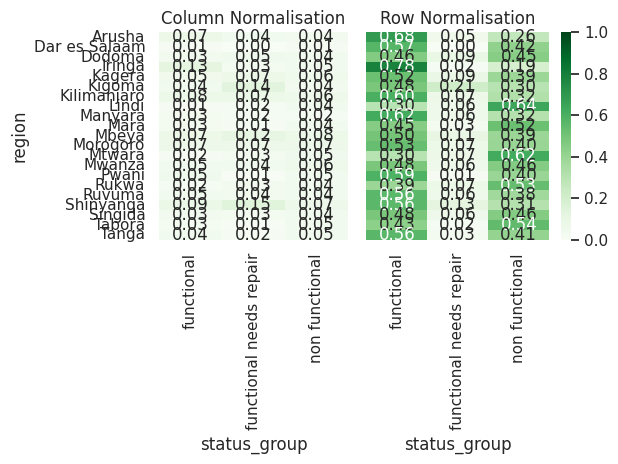

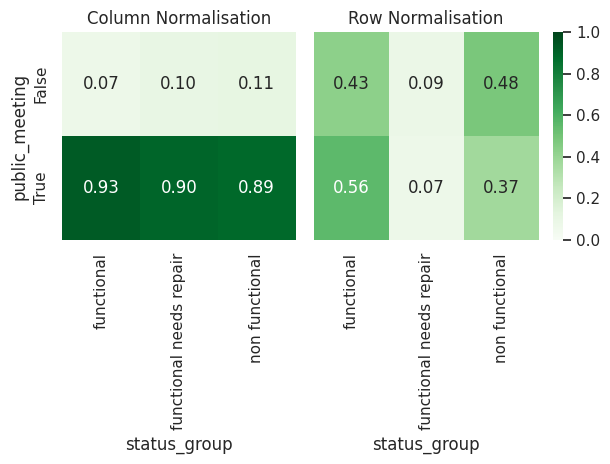

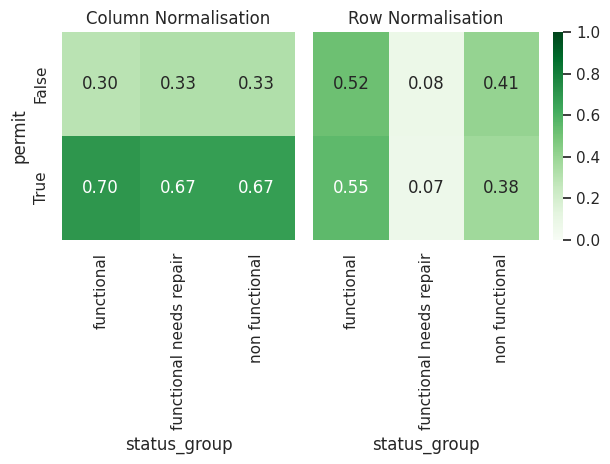

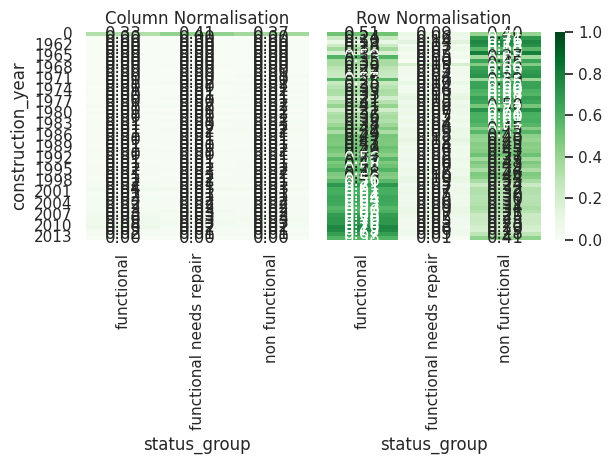

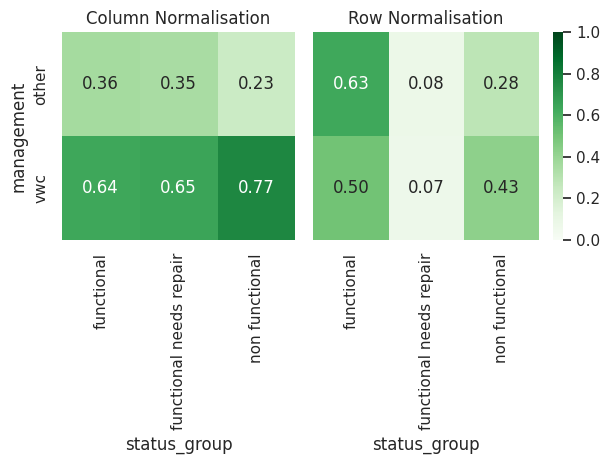

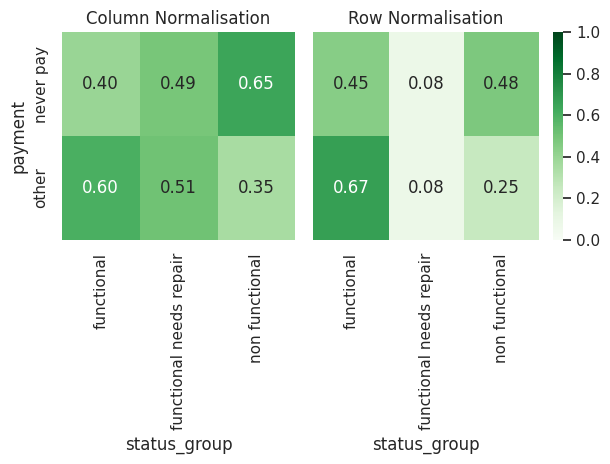

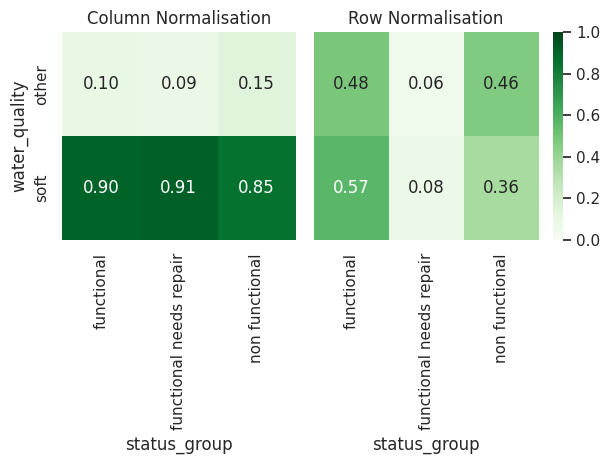

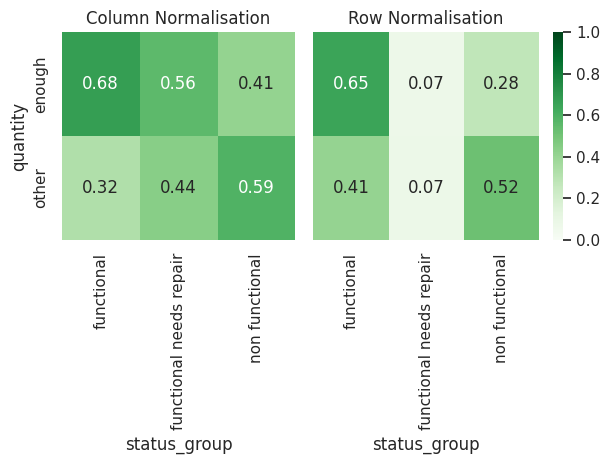

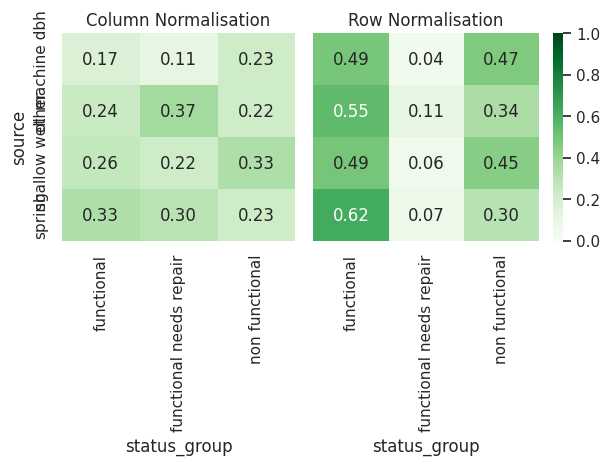

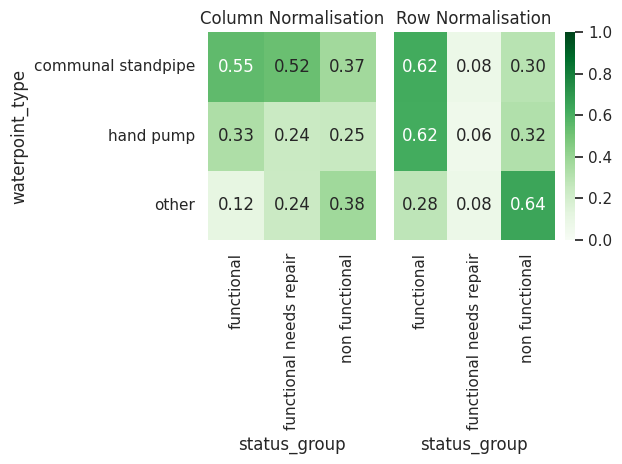

In [ ]:
# categorical features vs target
cat_cols=df_pumps.select_dtypes("object").columns.delete([0,6,-1])
gridspec = {'width_ratios':[0.83,1]}
for c in cat_cols :
  fig, axes = plt.subplots(ncols=2, sharey=True, gridspec_kw=gridspec)
  contingency_table_norm_cols = pd.crosstab(df_pumps[c],df_pumps["status_group"], normalize="columns")
  contingency_table_norm_rows = pd.crosstab(df_pumps[c],df_pumps["status_group"], normalize="index")
  sns.heatmap(contingency_table_norm_cols, vmin=0, vmax=1, annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=axes[0])
  sns.heatmap(contingency_table_norm_rows, vmin=0, vmax=1, annot=True, fmt=".2f", cmap="Greens", ax=axes[1])
  axes[1].set_ylabel("")
  axes[0].set_title("Column Normalisation")
  axes[1].set_title("Row Normalisation")
  plt.tight_layout()
  plt.show()

# Feature Engineering

In [ ]:
# replace "region" by "region_zone"
region_zone_dict = regions_by_class = {"Arusha": "North", "Dodoma": "Middle", "Iringa": "South",
    "Kagera": "North", "Kigoma": "North", "Kilimanjaro": "North", "Lindi": "South", "Manyara": "North",
    "Mara": "North", "Mbeya": "South", "Morogoro": "Middle", "Mtwara": "South", "Mwanza": "North",
    "Pwani": "South", "Rukwa": "South", "Ruvuma": "South", "Shinyanga": "Middle", "Singida": "Middle",
    "Tabora": "Middle", "Tanga": "North", "Dar es Salaam": "Middle"}
df_pumps["region_zone"] = df_pumps["region"].map(region_zone_dict)
df_pumps.drop(columns="region", inplace=True)

In [ ]:
df_pumps["construction_year"] = df_pumps["construction_year"].astype(float)
mean_year =  df_pumps["construction_year"][df_pumps["construction_year"]!=0].mean().round(0)
df_pumps["construction_year"].replace(0,mean_year,inplace=True)

In [ ]:
# create a feature for operating time
df_pumps["record_year"] = pd.to_datetime(df_pumps.date_recorded).dt.year
df_pumps["operating_time"] = df_pumps["record_year"] - df_pumps["construction_year"].astype("float")
df_pumps.drop(columns=["date_recorded","record_year","construction_year"],inplace=True)

<Axes: xlabel='status_group', ylabel='operating_time'>

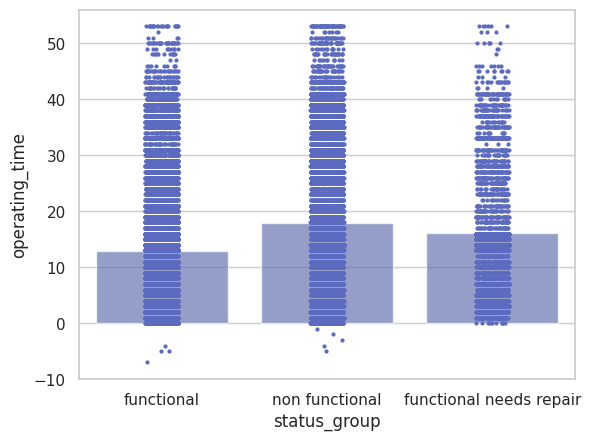

In [ ]:
sns.barplot(data=df_pumps, x="status_group", y="operating_time", errorbar=None, color="#5C6BC0", alpha=0.7)
sns.stripplot(data=df_pumps, x="status_group", y="operating_time", size=3, color="#5C6BC0")

# Data Explanation

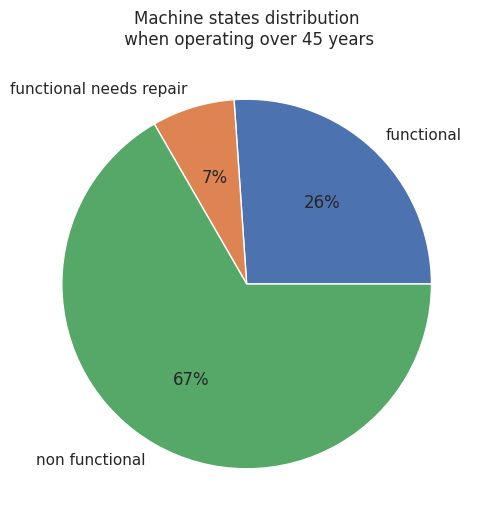

In [ ]:
df_filtred_ot = df_pumps[df_pumps.operating_time>45]
df_filtred_ot["Number_of_states"] = 1
df_filtred_ot = df_filtred_ot.groupby("status_group",as_index=False).sum()
plt.figure(figsize=(6,6))
plt.pie(df_filtred_ot["Number_of_states"], labels=df_filtred_ot["status_group"], autopct='%.0f%%')
plt.title("Machine states distribution\n when operating over 45 years")
plt.show()

The magority of pumps states is non functional when the pump is oprating over 45 years so there is high risk of failure over this operating period.

In [ ]:
df_filtred_sg = (df_pumps[df_pumps.status_group=="non functional"]).dropna()
df_filtred_sg["Number_of_states"] = 1
df_filtred_sg = df_filtred_sg.groupby("management", as_index=False).sum()
plt.figure(figsize=(6,6))
plt.pie(df_filtred_sg["Number_of_states"], labels=df_filtred_sg["management"], autopct='%.0f%%')
plt.title("Distribution of non fonctional pumps\nstates over the management types")
plt.show()

The majority of non functional states are vwc managed. So it's most likely that there is a problem with this type of management.

# Modeling & Data Preprocessing

In [ ]:
# define features and target
X = df_pumps.drop(columns="status_group")
y = df_pumps["status_group"]

In [ ]:
# train-test split data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, stratify=y)

In [ ]:
# define different parameters for models
knn_params = dict(knn__n_neighbors=[2,5,20,50,100])
decision_tree_params = dict(decision_tree__max_depth=[5,50,200,1000],
                            decision_tree__min_samples_split=[2,20,50,100])
random_forest_params = dict(random_forest__n_estimators=[5,50,100],
                            random_forest__max_depth=[5,50,200],
                            random_forest__max_features=[0.2, 0.5])
adaboost_params = dict(adaboost__n_estimators= [50, 100],
                       adaboost__learning_rate=[1.0, 0.5])
xgboost_params = dict(xgboost__n_estimators= [100, 200, 400],
                                   xgboost__max_depth=[5,20, 100],
                                   xgboost__learning_rate= [0.05, 0.1])
stacking_classifier_params = dict(stacking_classifier__estimators = [[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                                  ('svr',LinearSVC(dual=False, random_state=42, penalty="l1"))],
                                   [('rf', RandomForestClassifier(n_estimators=50, random_state=42)),
                                  ('svr', LinearSVC(dual=False, random_state=42, penalty="l2"))]])

In [ ]:
models_dict = dict(knn=[KNeighborsClassifier(), knn_params],
                  decision_tree=[DecisionTreeClassifier(), decision_tree_params],
                   random_forest=[RandomForestClassifier(), random_forest_params],
                   adaboost=[AdaBoostClassifier(), adaboost_params],
                   xgboost=[XGBClassifier(subsample=.8, colsample_bytree=.8), xgboost_params],
                   stacking_classifier=[StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
                                  ('svr',LinearSVC(dual=False, random_state=42, penalty="l2"))]), stacking_classifier_params])

In [ ]:
# define numerical and categorical columns
num_cols = X_train.select_dtypes(float).columns
cat_cols = X_train.select_dtypes(object).columns
# create a column transformer for features
cols_transformer = ColumnTransformer((("num_transformer",StandardScaler(), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
# create an encoder for the target
label_encoder = LabelEncoder()
# fit and transform training target
y_train_encoded = label_encoder.fit_transform(y_train)
# transform test_target
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# display the correspondent classe for each integer
integer_mapping = {i: l for i, l in enumerate(label_encoder.classes_)}
integer_mapping

{0: 'functional', 1: 'functional needs repair', 2: 'non functional'}

As the non-functional state is the more critical one, we will focus on the f1 score for this class. this score is choosen to evaluate precision (we must avoid false positives because it will generate an unnecessary maintenance costs) and recall (we want to predict all states of pump failure).

# Model Evaluation and Improvement

In [ ]:
def  train_test_cls_reports(pipeline, X_train, X_test, y_train, y_test):
    pipeline.fit(X_train, y_train)
    cls_report_train = classification_report(y_train, pipeline.predict(X_train))
    cls_report_test = classification_report(y_test, pipeline.predict(X_test))
    print(f"* {pipeline.steps[-1][0]} - Training Set\n{cls_report_train}\n* {pipeline.steps[-1][0]} - Testing Set\n{cls_report_test}")

In [ ]:
for model in models_dict.keys():
  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])
  train_test_cls_reports(pipeline, X_train, X_test, y_train, y_test)

'for model in models_dict.keys():\n  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])\n  train_test_cls_reports(pipeline, X_train, X_test, y_train, y_test)'

For a default tuing, the random forest model has the best class 2 f1 score (0.77)

In [ ]:
for model in models_dict.keys():
  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])
  grid_search = GridSearchCV(pipeline, models_dict[model][1],
                            scoring=make_scorer(f1_score, labels=[2], average='micro'))
  grid_search.fit(X_train, label_encoder.fit_transform(y_train))
  print(f"* {model}\n  - Best Score: {grid_search.best_score_}\n  - Best Parameters: {grid_search.best_params_}")

'for model in models_dict.keys():\n  pipeline = Pipeline([("preprocessor",cols_transformer),(model,models_dict[model][0])])\n  grid_search = GridSearchCV(pipeline, models_dict[model][1],\n                            scoring=make_scorer(f1_score, labels=[2], average=\'micro\'))\n  grid_search.fit(X_train, label_encoder.fit_transform(y_train))\n  print(f"* {model}\n  - Best Score: {grid_search.best_score_}\n  - Best Parameters: {grid_search.best_params_}")'

The XGBoost classifier has the best score so it is the most generalized model.

In [ ]:
# display metrics of the XGBoost model tuned with other parameters
xgboost = XGBClassifier(subsample=0.7, colsample_bytree=0.5, learning_rate=0.05, max_depth=200, n_estimators=100)
pipeline = Pipeline([("preprocessor",cols_transformer),("XGBoost",xgboost)])
train_test_cls_reports(pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

* XGBoost - Training Set
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     22581
           1       0.90      0.66      0.76      3022
           2       0.95      0.92      0.93     15977

    accuracy                           0.93     41580
   macro avg       0.92      0.85      0.88     41580
weighted avg       0.93      0.93      0.93     41580

* XGBoost - Testing Set
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      9678
           1       0.57      0.28      0.38      1295
           2       0.80      0.75      0.77      6847

    accuracy                           0.78     17820
   macro avg       0.72      0.64      0.66     17820
weighted avg       0.77      0.78      0.77     17820



In [ ]:
# use model with PCA
cols_transformer_pca = ColumnTransformer((("num_transformer",make_pipeline(StandardScaler(),PCA(n_components=0.95)), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
xgboost = XGBClassifier(subsample=0.7, colsample_bytree=0.5, learning_rate=0.05, max_depth=200, n_estimators=100)
pipeline = Pipeline([("preprocessor",cols_transformer_pca),("XGBoost with PCA",xgboost)])
train_test_cls_reports(pipeline, X_train, X_test, y_train_encoded, y_test_encoded)

* XGBoost with PCA - Training Set
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     22581
           1       0.92      0.77      0.84      3022
           2       0.96      0.95      0.96     15977

    accuracy                           0.95     41580
   macro avg       0.94      0.90      0.92     41580
weighted avg       0.95      0.95      0.95     41580

* XGBoost with PCA - Testing Set
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      9678
           1       0.53      0.29      0.37      1295
           2       0.78      0.72      0.75      6847

    accuracy                           0.76     17820
   macro avg       0.69      0.62      0.65     17820
weighted avg       0.76      0.76      0.76     17820



The performance of the model decreased by PCA

In [ ]:
cols_transformer_pca = ColumnTransformer((("num_transformer",make_pipeline(StandardScaler()), num_cols),
                                    ("cat_transformer",make_pipeline(SimpleImputer(strategy="most_frequent"),
                                                                                OneHotEncoder(sparse_output=False)), cat_cols)))
xgboost = XGBClassifier(subsample=0.7, colsample_bytree=0.5, learning_rate=0.05, max_depth=200, n_estimators=100)
pipeline = smt_pipeline([("preprocessor",cols_transformer_pca),("smote",SMOTE()),("XGBoost",xgboost)])
pipeline.fit(X_train, y_train_encoded)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
cls_report_train = classification_report(y_train_encoded, y_train_pred)
cls_report_test = classification_report(y_test_encoded, y_test_pred)
print(f"* XGBoost with SMOTE - Training Set\n{cls_report_train}\n* XGBoost with SMOTE - Testing Set\n{cls_report_test}")

* XGBoost with SMOTE - Training Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     22581
           1       0.66      0.89      0.76      3022
           2       0.95      0.92      0.93     15977

    accuracy                           0.92     41580
   macro avg       0.85      0.91      0.88     41580
weighted avg       0.93      0.92      0.92     41580

* XGBoost with SMOTE - Testing Set
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      9678
           1       0.37      0.51      0.43      1295
           2       0.78      0.76      0.77      6847

    accuracy                           0.76     17820
   macro avg       0.65      0.69      0.67     17820
weighted avg       0.77      0.76      0.76     17820



The F1 score for the "non functional" class still the same by SMOTE resampling but for the "functional need repair" class, it was improved, so we will keep the SMOTE resampling in the model training.

In [ ]:
y_test_pred

array([2, 1, 2, ..., 0, 2, 2])

# Model Interpretation

Text(0.5, 1.0, 'Testing Set Confusion Matrix')

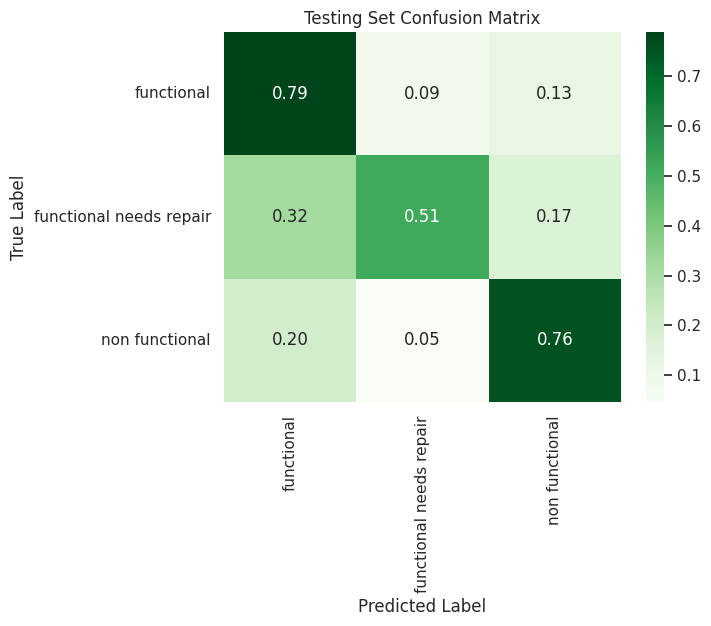

In [ ]:
cm = confusion_matrix(y_test_encoded,y_test_pred, normalize="true")
sns.heatmap(cm, xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot=True, fmt=".2f", cmap="Greens")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Testing Set Confusion Matrix")

76% of the non functional states were detected by the model which allow to signicantly avoid pumps failures. Face to states where the pump is functional but needs repair, the model is less efficient with only 51% from these states were truly predicted.

In [ ]:
# display feature importances depending on the mean decrease in impurity
data = list(zip(xgboost.feature_names_in_, xgboost.feature_importances_))
df_importances = pd.DataFrame(data, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)
df_importances

,Feature,Importance
40,cat_transformer__waterpoint_type_other,0.114901
25,cat_transformer__extraction_type_other,0.068525
24,cat_transformer__extraction_type_gravity,0.051596
39,cat_transformer__waterpoint_type_hand pump,0.049619
33,cat_transformer__quantity_other,0.045922
32,cat_transformer__quantity_enough,0.036966
8,cat_transformer__basin_Lake Rukwa,0.031246
37,cat_transformer__source_spring,0.028523
36,cat_transformer__source_shallow well,0.028100
10,cat_transformer__basin_Lake Victoria,0.027526


The fact that the type of the water pump is "other" or not has a significant importance for the model.

# Conclusion

The model has a good performance on detecting states of non functinality, but it is weak face to states where the water pump is functional but needs repair so using it to detect these states is not reliable.
We note also that when the type of the water pump is "other" then the risk of failure is high, so this type must be dealt with.